#### The advertising dataset consists of the sales of a product in 200 different markets, along with advertising budgets for three different media: TV, radio, and newspaper.

We’ll use the dataset to predict the amount of sales (dependent variable), based on the TV, radio and newspaper advertising budgets (independent variables).

In [9]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sns.set()

#### Import and describe datasets

In [6]:
df = pd.read_csv('data/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
# We will drop the first column ("Unnamed:0") since we do not need it
df = df.drop(['Unnamed: 0'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Our dataset remain with 4 columns, inclusive of the dependent variable ("sales") with 200 rows and no missing values

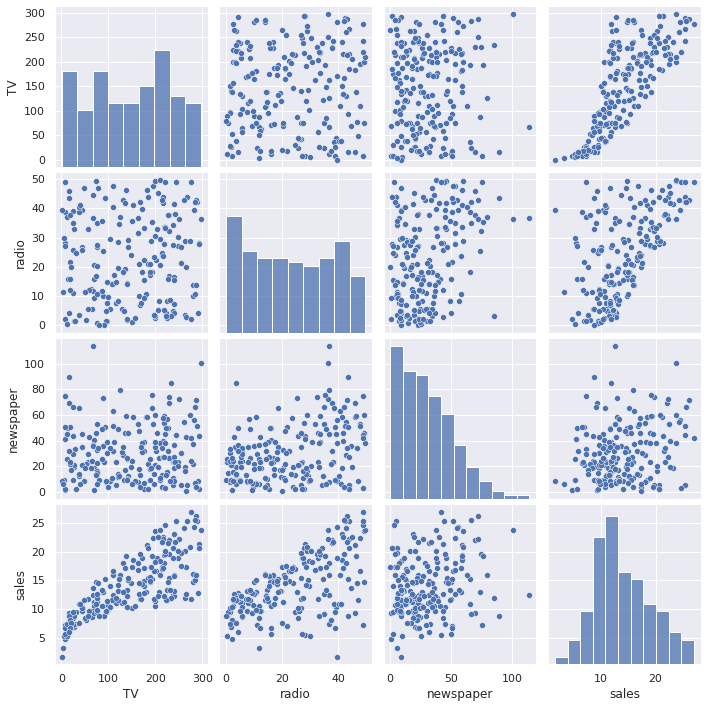

In [10]:
# Lets visualise relationship between independent and dependent variables:
sns.pairplot(df)
plt.show()

- TV and Sales seems to be prety strong relationship
- There seem to be some trend between radio and sales
- The relationship between newspaper and radio sees to not exist..

<AxesSubplot:>

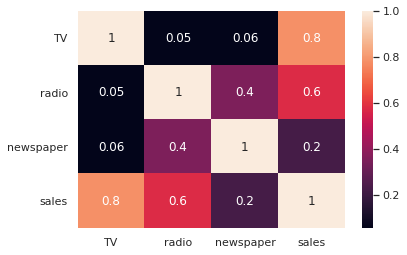

In [14]:
# Let us check the above relationship using correlation coefficient:
sns.heatmap(df.corr(),fmt='.1g', annot=True)

- As we can see, the strongest relationship occur between sales and TV
- The relationship between sales and newspaper is close to zero.

#### Selecting dependent and independent variables:

In [15]:
X = df.drop(['sales'], axis=1)
y = df['sales']

#### SPliting the dataset:

- Dividing the dataset into training and testing set help to understand model perfomance
- We will split the data into 70% training and for 30% testing. 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((140, 3), (140,), (60, 3), (60,))

#### Build Model

In [18]:
model = LinearRegression()

##### train a model

In [19]:
model.fit(X_train,y_train)

LinearRegression()

In [20]:
## Model output:
model.intercept_

2.880255286331323

In [23]:
## Coefficients:
pd.DataFrame(model.coef_,X.columns.values, columns=['Coefficient'])

,Coefficient
TV,0.043915
radio,0.200280
newspaper,0.001844


We can estimate out sales based on different values of TV, Radio and Newspaper:

sales = 2.880 + 0.0434*TV + 0.200*Radio + 0.002 * Newspaper

#### Testing the model:

For testing we use the test dataset that is independent of training set

In [24]:
y_pred = model.predict(X_test)

#### Evaluate the model perfomance:

The model quality is related to how well its predictions match up with the actual target values of the testing set.
- We do this by checking the proportion of explained varience of dependent variable by independent variable,R-squared,
- Checking the average amount that the response will deviate from the true regression line (lack of fit of the model to the data), RSE

In [26]:
from sklearn import metrics

In [40]:
## Residual sum of square
RSS = sum((y_test - y_pred)**2)
print('Residial sum of square: {}'.format(RSS))

## Residual standard error: 
n = X_test.shape[0]
p = X_test.shape[1]
RSE = np.sqrt(RSS/(n-p-1))
print('Residial standard error: {}'.format(RSE))

## Percentage error:
PE = RSE/y_test.mean()
print('Percentage error: {}'.format(PE))
## R-squared:
TSS = sum((y_test - y_test.mean())**2)
print('Total Sum of square: {}'.format(TSS))

r_squared = 1 - (RSS/TSS)
print('R-squared: {}'.format(r_squared))

Residial sum of square: 221.48369074191646
Residial standard error: 1.9887347500623735
Percentage error: 0.15014984900433173
Total Sum of square: 1639.4284999999998
R-squared: 0.8649018906637792


 The R-squared of 0.86 is not too bad. 

#### How to interpret and improve our model

In [41]:
X2 = sm.add_constant(X_train)
stats_model = sm.OLS(y_train,X2).fit()
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     439.9
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           8.76e-70
Time:                        11:48:42   Log-Likelihood:                -262.41
No. Observations:                 140   AIC:                             532.8
Df Residuals:                     136   BIC:                             544.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8803      0.360      7.994      0.000       2.168       3.593
TV             0.0439      0.002     27.027      0.000       0.041       0.047
radio          0.2003      0.009     21.577      0.000       0.182       0.219
newspaper      0.0018      0.007      0.268      0.789      -0.012       0.015
==============================================================================
Omnibus:                       10.989   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.961
Skew:                          -0.716   Prob(JB):                      0.00253
Kurtosis:                       2.961   Cond. No.                         476.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Results interpretation (coefficients):

- For a given amount of TV and Radio, an additional spending of 1000 on radio advertisement will lead to increase in sales by approaximatetly 200 units. 

### Hypothesis test:

1. Is at least one of predictors (TV, Radi amd Newspaper) useful in predicting sales (is there a relationship between predictors and response):

- Null hypothesis: All coefficients are equal to zero: There is no relationship between predictor and target variable.
- Alternative hypothesis: At least one of the coefficients is non-zero.
- The F-statistics is more than 1, (439) providing evidence against the null hypothesis.
- Next we also oserve the probalilty of observing the F-statistic value, assuming that null hypothesis is true, is 0.000000876. Extremely small number, lower than 1%.
- Given this, we can reject the null hypothesis and be confident that at least one predictor is usefull in predicting the output.

2. Which independent variables contribute to the dependent variable (i.e which media contribute to sales):
 - We examine the p-vlues asociated with each predictors t-statistics.
 - The p-value tell if the variable is statistically significant to predict the target or not. If the p-value id less than 0.05 then there is a strong evidance that there is a strong relationship between that variable and the target. 
 -  The p-value of TV, radio are very low, almost zero but the p-value of newspaper is high 0.789.
 - This suggest that only TV and Radio are related to sales.
 



In [ ]:
### Linear regression assumptions:
1. Linearity - Linear regression assume that there is a straight-line (linear) relationship between predictor and response.
 - Residual plots are used to identify linearity: Residual vs Predictor or (predicted values in case of multiple regression)
 - Ideally the residual plot should not show any form of pattern. Any form of patten provide strong evidence of non-linearity.
 - If non-linearity exist, we use non-linear transformation of the predictors such as log X, X^2 and sqrt(X)

2. Mean of residual is zero - 

3. Constant varience of error terms (Homoscedasticity) - The error term have a constant varience
 - Non-constant varience in the errors (heteroscedasticity) can be identified from the funnel shape in residual plot.
 - In such situation, we normally transform the respone variable using concave function such as logY or sqrt(Y)
 - The transformation results in greater amount of shrinkage  in large response, leading to reduction in heteroscedacticity

4. The residula terms are normamally distributed
5. No atocorrelation of residuals - If residual are autocorrelated this implies that current value id dependent on the previous values.
6. No collinearity - 